In [34]:
import pandas as pd
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [5]:
df = pd.read_csv("data/RNASeq_tumor-v-normal_log_transform.tsv", delimiter="\t", low_memory=False)

In [55]:
gene_columns = df.columns[1:-2]
X = df[gene_columns].copy()
y = df["label"].copy()

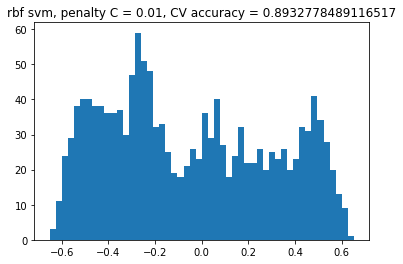

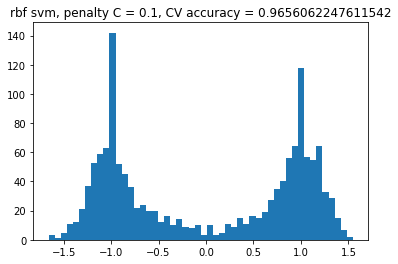

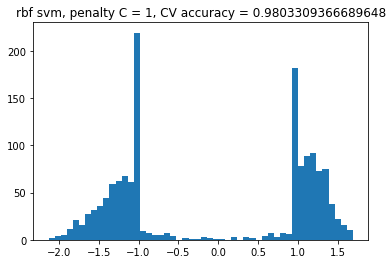

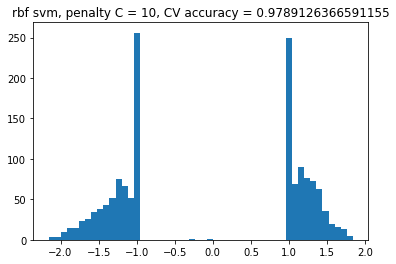

In [60]:
for penalty in [0.01, 0.1, 1, 10]:
    classifier = svm.SVC(kernel="rbf", C=penalty)
    classifier.fit(X, y)
    permute = np.random.permutation(range(len(X)))
    scores = cross_val_score(classifier, X.iloc[permute], y.iloc[permute], cv=5)
    distance = classifier.decision_function(X)
    plt.figure(str(penalty))
    plt.hist(distance, bins=50)
    plt.title("rbf svm, penalty C = {0}, CV accuracy = {1}".format(penalty, np.mean(scores)))
plt.show()